In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [ ]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=1hWnCBzSN9F2rXjQsBc2113mL0FeIjCIx&export=download'
output = 'Flood_claims_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1hWnCBzSN9F2rXjQsBc2113mL0FeIjCIx&export=download
To: /content/Flood_claims_data.csv
100%|██████████| 298M/298M [00:04<00:00, 70.1MB/s]


'Flood_claims_data.csv'

In [ ]:
data = pd.read_csv('Flood_claims_data.csv')
data.head()# year month date were extracted 

,incidentType,declarationDate,disasterNumber,county,damagedStateAbbreviation,damagedCity,damagedZipCode,applicantAge,householdComposition,occupantsUnderTwo,...,repairAmount,replacementAssistanceEligible,replacementAmount,personalPropertyEligible,personalPropertyAmount,ihpMax,haMax,onaMax,lastRefresh,id
0,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,FORT KENT,4743,50-64,2,0,...,0.00,0,0.0,1,6324.81,0,0,0,2023-03-18T07:06:40.000Z,dc3060be-3caa-4d34-8a29-db772fa4dba3
1,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,FORT KENT,4743,65+,1,0,...,0.00,0,0.0,1,5460.70,0,0,0,2023-03-18T07:06:40.000Z,7a31d386-debb-48cd-9629-a8a62e7b1b86
2,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,EAGLE LAKE,4739,35-49,3,0,...,2785.93,0,0.0,0,0.00,0,0,0,2023-03-18T07:06:40.000Z,02304f86-de2d-48a3-8a13-6b9e2c66e91e
3,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,VAN BUREN,4785,50-64,3,0,...,260.72,0,0.0,0,0.00,0,0,0,2023-03-18T07:06:40.000Z,85697a0c-f141-4bac-9a28-d6b68ec15b4a
4,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,ISLAND FALLS,4747,19-34,4,1,...,0.00,0,0.0,0,0.00,0,0,0,2023-03-18T07:06:40.000Z,285ec88c-fda5-40ba-9e7f-9bed0c243613


In [ ]:
df=data.copy() #making a deep copy of df
df

,incidentType,declarationDate,disasterNumber,county,damagedStateAbbreviation,damagedCity,damagedZipCode,applicantAge,householdComposition,occupantsUnderTwo,...,repairAmount,replacementAssistanceEligible,replacementAmount,personalPropertyEligible,personalPropertyAmount,ihpMax,haMax,onaMax,lastRefresh,id
0,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,FORT KENT,4743,50-64,2,0,...,0.00,0,0.0,1,6324.81,0,0,0,2023-03-18T07:06:40.000Z,dc3060be-3caa-4d34-8a29-db772fa4dba3
1,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,FORT KENT,4743,65+,1,0,...,0.00,0,0.0,1,5460.70,0,0,0,2023-03-18T07:06:40.000Z,7a31d386-debb-48cd-9629-a8a62e7b1b86
2,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,EAGLE LAKE,4739,35-49,3,0,...,2785.93,0,0.0,0,0.00,0,0,0,2023-03-18T07:06:40.000Z,02304f86-de2d-48a3-8a13-6b9e2c66e91e
3,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,VAN BUREN,4785,50-64,3,0,...,260.72,0,0.0,0,0.00,0,0,0,2023-03-18T07:06:40.000Z,85697a0c-f141-4bac-9a28-d6b68ec15b4a
4,Flood,2008-05-09T00:00:00.000Z,1755,Aroostook (County),ME,ISLAND FALLS,4747,19-34,4,1,...,0.00,0,0.0,0,0.00,0,0,0,2023-03-18T07:06:40.000Z,285ec88c-fda5-40ba-9e7f-9bed0c243613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846251,Flood,2004-04-21T00:00:00.000Z,1512,"Essex (County)(in PMSA 1120,4160,7090)",MA,SAUGUS,1906,35-49,2,0,...,506.88,0,0.0,0,0.00,0,0,0,2023-03-18T05:43:51.000Z,db7d500e-acb6-4dfa-9093-20572f902170
846252,Flood,2004-04-21T00:00:00.000Z,1512,"Essex (County)(in PMSA 1120,4160,7090)",MA,MARBLEHEAD,1945,35-49,4,0,...,3571.60,0,0.0,0,0.00,0,0,0,2023-03-18T05:43:51.000Z,7325e587-dbd4-4540-8e46-ad138b7c1fae
846253,Flood,2004-04-21T00:00:00.000Z,1512,"Essex (County)(in PMSA 1120,4160,7090)",MA,PEABODY,1960,50-64,3,0,...,0.00,0,0.0,0,0.00,0,0,0,2023-03-18T05:43:51.000Z,d1faaeaa-8022-4f66-98d6-5e155899c6b1
846254,Flood,2004-04-21T00:00:00.000Z,1512,Suffolk (County),MA,GROVE HALL,2121,65+,3,0,...,0.00,0,0.0,0,0.00,0,0,0,2023-03-18T05:43:51.000Z,e4dd9ec7-8fea-4bdb-93cc-f59aa3ff83b3


### Data Preprocessing

In [ ]:
df.shape    # gives shape of the pandas dataframe

(846256, 71)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846256 entries, 0 to 846255
Data columns (total 71 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   incidentType                   846256 non-null  object 
 1   declarationDate                846256 non-null  object 
 2   disasterNumber                 846256 non-null  int64  
 3   county                         846256 non-null  object 
 4   damagedStateAbbreviation       846256 non-null  object 
 5   damagedCity                    846256 non-null  object 
 6   damagedZipCode                 846256 non-null  int64  
 7   applicantAge                   846194 non-null  object 
 8   householdComposition           846256 non-null  object 
 9   occupantsUnderTwo              846256 non-null  object 
 10  occupants2to5                  846256 non-null  object 
 11  occupants6to18                 846256 non-null  object 
 12  occupants19to64               

In [ ]:
df.columns[df.isnull().any()]# looking for missing values in dataframe

Index(['applicantAge', 'grossIncome', 'primaryResidence', 'registrationMethod',
       'haStatus', 'utilitiesOut', 'homeDamage', 'autoDamage',
       'emergencyNeeds', 'foodNeed', 'shelterNeed', 'sbaEligible',
       'habitabilityRepairsRequired', 'renterDamageLevel',
       'highWaterLocation'],
      dtype='object')

In [ ]:
df.loc[:,['applicantAge', 'grossIncome', 'primaryResidence', 'registrationMethod',
       'haStatus', 'utilitiesOut', 'homeDamage', 'autoDamage',
       'emergencyNeeds', 'foodNeed', 'shelterNeed', 'sbaEligible',
       'habitabilityRepairsRequired', 'renterDamageLevel',
       'highWaterLocation']].isna().sum()# since there are too many  missing values in theses columns its better to drop these columns

applicantAge                       62
grossIncome                         1
primaryResidence                 5626
registrationMethod               2643
haStatus                       127533
utilitiesOut                     2341
homeDamage                      16595
autoDamage                          2
emergencyNeeds                      7
foodNeed                       655341
shelterNeed                    726406
sbaEligible                    846256
habitabilityRepairsRequired    184326
renterDamageLevel              769633
highWaterLocation              320346
dtype: int64

In [ ]:
#drop unnessisary col
df.drop(['habitabilityRepairsRequired', 'haStatus', 'renterDamageLevel',
       'highWaterLocation','lastRefresh','sbaEligible','shelterNeed','foodNeed',],axis=1,inplace=True)
df.shape

(846256, 63)

In [ ]:
df.columns[df.isnull().any()]# looking for missing values in dataframe

Index(['applicantAge', 'grossIncome', 'primaryResidence', 'registrationMethod',
       'utilitiesOut', 'homeDamage', 'autoDamage', 'emergencyNeeds'],
      dtype='object')

In [ ]:
df.loc[:,['applicantAge', 'grossIncome', 'primaryResidence', 'registrationMethod',
       'utilitiesOut', 'homeDamage', 'autoDamage', 'emergencyNeeds']].isna().sum()

applicantAge             62
grossIncome               1
primaryResidence       5626
registrationMethod     2643
utilitiesOut           2341
homeDamage            16595
autoDamage                2
emergencyNeeds            7
dtype: int64

In [ ]:
#Replace the missing values with median for 
miscol=['primaryResidence','utilitiesOut', 'homeDamage', 'autoDamage', 'emergencyNeeds']

for col in miscol:
    df[col].fillna(df[col].median(), inplace=True)

df.dropna(inplace=True) #for thes rest of object type missing values

In [ ]:
df.loc[:,['applicantAge', 'grossIncome', 'primaryResidence', 'registrationMethod',
       'utilitiesOut', 'homeDamage', 'autoDamage', 'emergencyNeeds']].isna().sum()

applicantAge          0
grossIncome           0
primaryResidence      0
registrationMethod    0
utilitiesOut          0
homeDamage            0
autoDamage            0
emergencyNeeds        0
dtype: int64

### EDA

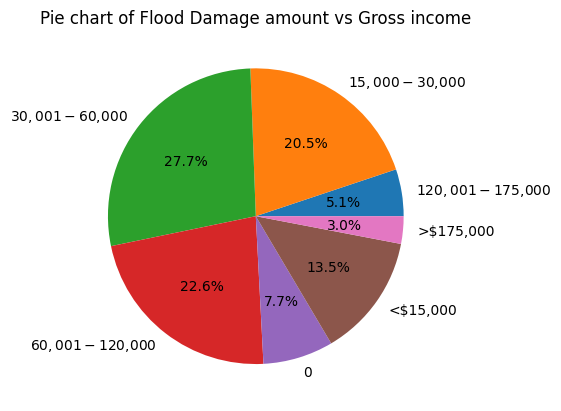

grossIncome
$120,001-$175,000    1.470191e+08
$15,000-$30,000      5.859143e+08
$30,001-$60,000      7.923623e+08
$60,001-$120,000     6.467865e+08
0                    2.202889e+08
<$15,000             3.860259e+08
>$175,000            8.614167e+07
Name: floodDamageAmount, dtype: float64


In [ ]:
visualization_data=df[['floodDamageAmount','grossIncome','declarationDate','applicantAge','county','damagedStateAbbreviation','damagedCity']]



#first pie chart
pie=visualization_data.groupby('grossIncome')["floodDamageAmount"].sum()
labels=['$120,001-$175,000',    
'$15,000-$30,000',      
'$30,001-$60,000',      
'$60,001-$120,000',     
'0',                    
'<$15,000',             
'>$175,000']
plt.pie(pie,labels=labels ,autopct='%1.1f%%')
plt.title("Pie chart of Flood Damage amount vs Gross income")
plt.show()
print(pie)

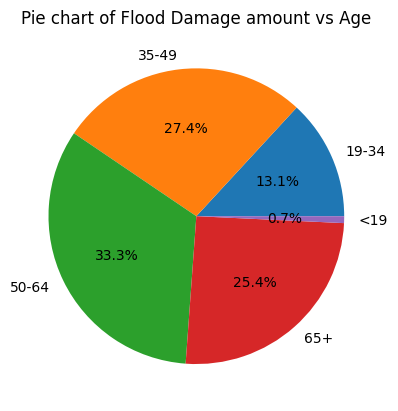

applicantAge
19-34    3.762622e+08
35-49    7.844581e+08
50-64    9.545931e+08
65+      7.278401e+08
<19      2.138519e+07
Name: floodDamageAmount, dtype: float64


In [ ]:
#first pie chart
pie=visualization_data.groupby('applicantAge')["floodDamageAmount"].sum()
labels=['19-34',
'35-49',
'50-64',
'65+',
'<19']
plt.pie(pie,labels=labels ,autopct='%1.1f%%')
plt.title("Pie chart of Flood Damage amount vs Age")
plt.show()
print(pie)

In [ ]:
import calendar

line=visualization_data[['floodDamageAmount','declarationDate']]
# Using pandas.DatetimeIndex() to extract month and year
line['year'] = pd.DatetimeIndex(line['declarationDate']).year
line['month'] = pd.DatetimeIndex(line['declarationDate']).month
line.head()

,floodDamageAmount,declarationDate,year,month
0,14427.53,2008-05-09T00:00:00.000Z,2008,5
1,16600.91,2008-05-09T00:00:00.000Z,2008,5
2,3155.92,2008-05-09T00:00:00.000Z,2008,5
3,260.72,2008-05-09T00:00:00.000Z,2008,5
4,4245.07,2008-05-09T00:00:00.000Z,2008,5


year
2008    1.805922e+06
2009    2.845299e+07
2010    6.449892e+06
2011    3.341666e+08
2013    2.009880e+08
2014    1.033097e+08
2015    7.975903e+07
2016    1.558834e+09
2017    2.482784e+07
2018    5.295026e+07
2019    2.090640e+08
2020    2.281513e+06
2021    4.625349e+07
2022    1.877045e+08
2023    2.769115e+07
Name: floodDamageAmount, dtype: float64


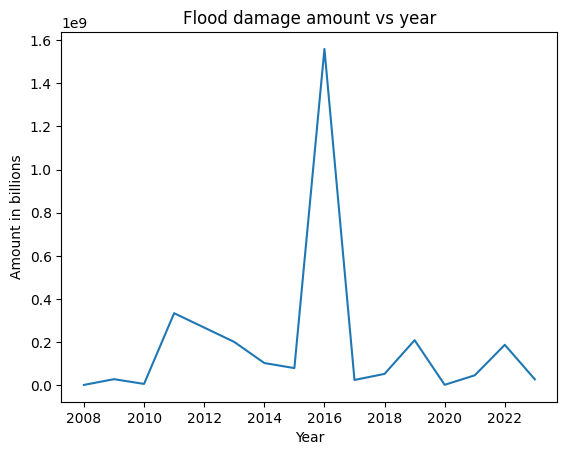

In [ ]:
# Flood damage amount vs year
linechart=line.groupby('year')["floodDamageAmount"].sum()
plt.ylabel("Amount in billions")
plt.xlabel("Year")
plt.title("Flood damage amount vs year")
plt.plot(linechart)
print(linechart)

month
1     8.539244e+07
3     2.217506e+08
4     1.050374e+08
5     3.046031e+08
6     2.016252e+08
7     1.632424e+08
8     1.241636e+09
9     3.224840e+08
10    2.155945e+08
11    3.172942e+06
Name: floodDamageAmount, dtype: float64


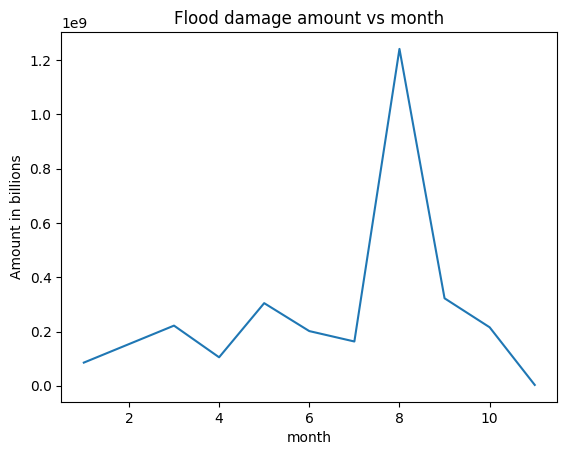

In [ ]:
# Flood damage amount vs month
linechart=line.groupby('month')["floodDamageAmount"].sum()
plt.ylabel("Amount in billions")
plt.xlabel("month")
plt.title("Flood damage amount vs month")
plt.plot(linechart)
print(linechart)

                          floodDamageAmount
damagedStateAbbreviation                   
LA                             1.303766e+09
TX                             3.393960e+08
PA                             1.565630e+08
IL                             1.536571e+08
KY                             1.330974e+08
ND                             1.271390e+08
MI                             1.033097e+08
MO                             9.634000e+07
SC                             7.335564e+07
WV                             6.480875e+07


Text(0.5, 1.0, 'Flood Damage Amount vs Top 10 Damaged State')

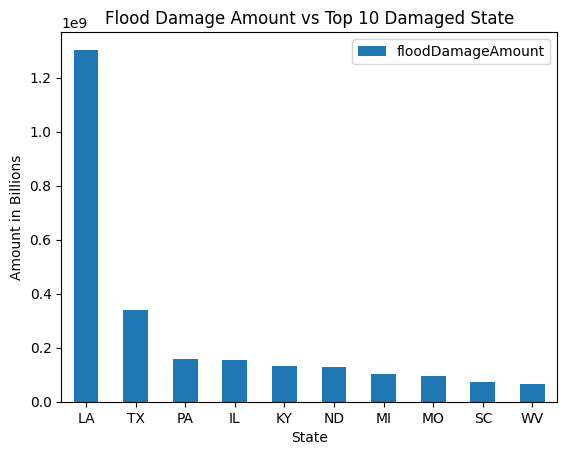

In [ ]:
# Bar chart of flood damage amout vs State
barchart=pd.DataFrame(visualization_data.groupby('damagedStateAbbreviation')["floodDamageAmount"].sum())
barchart=barchart.sort_values(by=['floodDamageAmount'], ascending=False)
print(barchart.head(10))
ax = barchart.head(10).plot.bar( rot=0)
plt.ylabel("Amount in Billions")
plt.xlabel("State")
plt.title("Flood Damage Amount vs Top 10 Damaged State")


                           floodDamageAmount
county                                      
East Baton Rouge (Parish)       5.619086e+08
Livingston (Parish)             3.461919e+08
Ward (County)                   1.207184e+08
Ascension (Parish)              1.115117e+08
Harris (County)                 9.191819e+07
Cook (County)                   9.064819e+07
Wayne (County)                  7.780078e+07
Jefferson (County)              5.829739e+07
Lafayette (Parish)              5.435124e+07
Tangipahoa (Parish)             5.407269e+07


Text(0.5, 1.0, 'Flood Damage Amount vs Top 10 Damaged county')

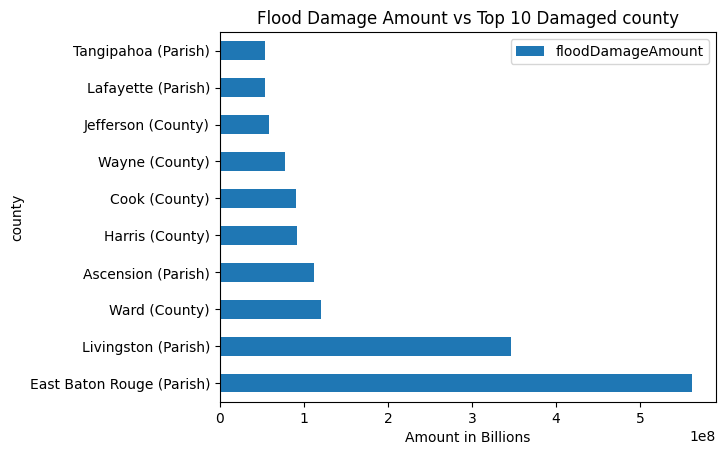

In [ ]:
# Bar chart of flood damage amout vs State
barchart=pd.DataFrame(visualization_data.groupby('county')["floodDamageAmount"].sum())
barchart=barchart.sort_values(by=['floodDamageAmount'], ascending=False)
print(barchart.head(10))
ax = barchart.head(10).plot.barh( rot=0)
plt.xlabel("Amount in Billions")
plt.ylabel("county")
plt.title("Flood Damage Amount vs Top 10 Damaged county")

                   floodDamageAmount
damagedCity                         
BATON ROUGE             4.394057e+08
DENHAM SPRINGS          2.414958e+08
MINOT                   1.144393e+08
HOUSTON                 6.201162e+07
GREENWELL SPRINGS       5.715174e+07
DETROIT                 5.545005e+07
SAINT AMANT             5.170938e+07
BAKER                   4.192334e+07
PRAIRIEVILLE            3.814905e+07
CHICAGO                 3.805529e+07


Text(0.5, 1.0, 'Flood Damage Amount vs Top 10 Damaged City')

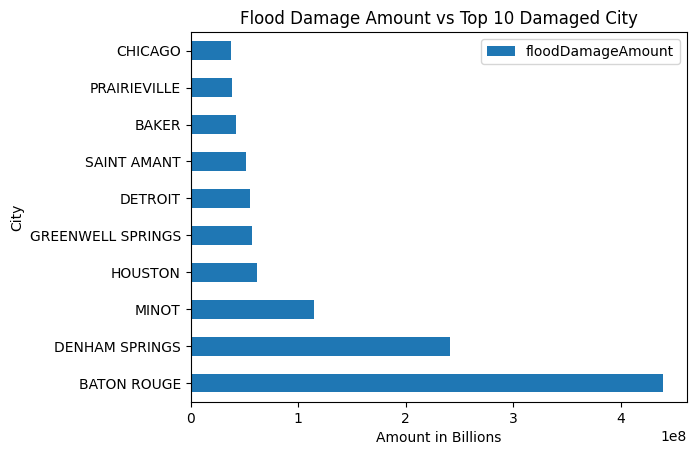

In [ ]:
# Bar chart of flood damage amout vs damagedCity
barchart=pd.DataFrame(visualization_data.groupby('damagedCity')["floodDamageAmount"].sum())
barchart=barchart.sort_values(by=['floodDamageAmount'], ascending=False)
print(barchart.head(10))
ax = barchart.head(10).plot.barh( rot=0)
plt.xlabel("Amount in Billions")
plt.ylabel("City")
plt.title("Flood Damage Amount vs Top 10 Damaged City")

### One Hot Encoding

In [ ]:
# one hot encoder

df = pd.get_dummies(df, columns = ['applicantAge','grossIncome','ownRent','residenceType','registrationMethod'])
df.iloc[:,58:]=df.iloc[:,58:].astype(int)
df=df.drop(['registrationMethod_Mobile','residenceType_Travel Trailer','ownRent_Unknown','applicantAge_<19'],axis=1)
df

,incidentType,disasterNumber,county,damagedStateAbbreviation,damagedCity,damagedZipCode,householdComposition,occupantsUnderTwo,occupants2to5,occupants6to18,...,residenceType_Correctional Facility,residenceType_House/Duplex,residenceType_Military Housing,residenceType_Mobile Home,residenceType_Other,residenceType_Townhouse,residenceType_Unknown,registrationMethod_Call Center,registrationMethod_DSAT,registrationMethod_Internet
0,Flood,1755,Aroostook (County),ME,FORT KENT,4743,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Flood,1755,Aroostook (County),ME,FORT KENT,4743,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Flood,1755,Aroostook (County),ME,EAGLE LAKE,4739,3,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,Flood,1755,Aroostook (County),ME,VAN BUREN,4785,3,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,Flood,1755,Aroostook (County),ME,ISLAND FALLS,4747,4,1,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844282,Flood,4709,Broward (County),FL,FORT LAUDERDALE,33315,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
844283,Flood,4709,Broward (County),FL,NORTH LAUDERDALE,33068,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
844284,Flood,4709,Broward (County),FL,FORT LAUDERDALE,33317,4,1,0,2,...,0,1,0,0,0,0,0,0,0,0
844285,Flood,4709,Broward (County),FL,FORT LAUDERDALE,33315,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843611 entries, 0 to 844286
Data columns (total 85 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   incidentType                            843611 non-null  object 
 1   disasterNumber                          843611 non-null  int64  
 2   county                                  843611 non-null  object 
 3   damagedStateAbbreviation                843611 non-null  object 
 4   damagedCity                             843611 non-null  object 
 5   damagedZipCode                          843611 non-null  int64  
 6   householdComposition                    843611 non-null  object 
 7   occupantsUnderTwo                       843611 non-null  object 
 8   occupants2to5                           843611 non-null  object 
 9   occupants6to18                          843611 non-null  object 
 10  occupants19to64                         8436

#### Feature Selection using Correlation plot

In [ ]:
dele=pd.DataFrame(df.drop(['incidentType','damagedStateAbbreviation','householdComposition','occupantsUnderTwo','occupants2to5','occupants6to18','occupants19to64','occupants65andOver','id',"damagedCity","county"],axis=1).corr().floodDamageAmount)
dele=dele[abs(dele["floodDamageAmount"])>=0.1]
dele

,floodDamageAmount
damagedZipCode,0.104457
primaryResidence,0.105705
homeOwnersInsurance,0.188682
floodInsurance,0.277723
ihpReferral,0.133564
ihpEligible,0.337573
ihpAmount,0.675841
fipAmount,0.124581
haReferral,0.158861
haEligible,0.382004


In [ ]:
dele.index

Index(['damagedZipCode', 'primaryResidence', 'homeOwnersInsurance',
       'floodInsurance', 'ihpReferral', 'ihpEligible', 'ihpAmount',
       'fipAmount', 'haReferral', 'haEligible', 'haAmount', 'onaEligible',
       'onaAmount', 'utilitiesOut', 'homeDamage', 'emergencyNeeds',
       'sbaApproved', 'inspnIssued', 'inspnReturned', 'rpfvl', 'ppfvl',
       'destroyed', 'waterLevel', 'floodDamage', 'floodDamageAmount',
       'foundationDamageAmount', 'tsaEligible', 'rentalAssistanceEligible',
       'rentalAssistanceAmount', 'repairAssistanceEligible', 'repairAmount',
       'replacementAssistanceEligible', 'replacementAmount',
       'personalPropertyEligible', 'personalPropertyAmount', 'ihpMax', 'haMax',
       'ownRent_Owner', 'ownRent_Renter'],
      dtype='object')

### Final Data

In [ ]:
# dropping all the insignificant columns
df=df.loc[:,['floodInsurance', 'damagedZipCode', 'primaryResidence', 'homeOwnersInsurance',
        'ihpReferral', 'ihpEligible', 'ihpAmount',
       'fipAmount', 'haReferral', 'haEligible', 'haAmount', 'onaEligible',
       'onaAmount', 'utilitiesOut', 'homeDamage', 'emergencyNeeds',
       'sbaApproved', 'inspnIssued', 'inspnReturned', 'ppfvl',
       'destroyed', 'waterLevel', 'floodDamage', 'floodDamageAmount',
       'foundationDamageAmount', 'tsaEligible', 'rentalAssistanceEligible',
       'rentalAssistanceAmount', 'repairAssistanceEligible', 'repairAmount',
       'replacementAssistanceEligible', 'replacementAmount',
       'personalPropertyEligible', 'personalPropertyAmount', 'ihpMax', 'haMax',
       'ownRent_Owner']]
# removed , 'rpfvl' as it is very highly correlated to flood damage amount
df

,floodInsurance,damagedZipCode,primaryResidence,homeOwnersInsurance,ihpReferral,ihpEligible,ihpAmount,fipAmount,haReferral,haEligible,...,rentalAssistanceAmount,repairAssistanceEligible,repairAmount,replacementAssistanceEligible,replacementAmount,personalPropertyEligible,personalPropertyAmount,ihpMax,haMax,ownRent_Owner
0,0,4743,1.0,0,1,1,13626.81,600,1,1,...,7302.0,0,0.00,0,0.0,1,6324.81,0,0,0
1,0,4743,1.0,0,1,1,14229.70,600,1,1,...,8769.0,0,0.00,0,0.0,1,5460.70,0,0,0
2,0,4739,1.0,1,1,1,11276.63,0,1,1,...,7838.0,1,2785.93,0,0.0,0,0.00,0,0,1
3,0,4785,1.0,1,1,1,260.72,0,1,1,...,0.0,1,260.72,0,0.0,0,0.00,0,0,1
4,1,4747,1.0,1,1,0,0.00,0,1,0,...,0.0,0,0.00,0,0.0,0,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844282,0,33315,1.0,1,1,0,0.00,0,1,0,...,0.0,0,0.00,0,0.0,0,0.00,0,0,1
844283,0,33068,1.0,0,1,0,0.00,0,1,0,...,0.0,0,0.00,0,0.0,0,0.00,0,0,0
844284,0,33317,1.0,1,1,0,0.00,0,1,0,...,0.0,0,0.00,0,0.0,0,0.00,0,0,1
844285,0,33315,1.0,0,1,0,0.00,0,1,0,...,0.0,0,0.00,0,0.0,0,0.00,0,0,0


In [ ]:
#sns.pairplot(df)

Text(0.5, 1.0, 'Relation between Flood Damage Amount vs ppfvl(FEMA-determined value of disaster-caused damage to real property)')

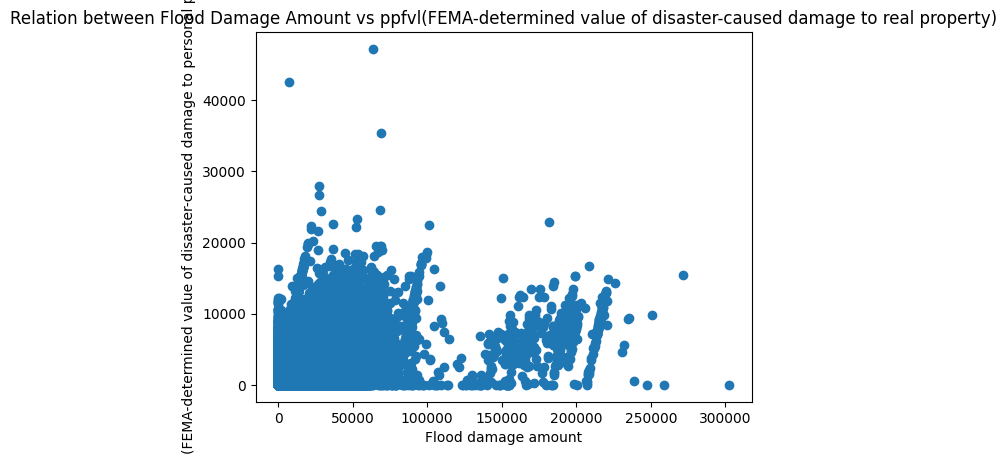

In [ ]:
# Lets visualize the relation between flood damage amount vs rpfvl
plt.scatter(df['floodDamageAmount'],df['ppfvl'])
plt.xlabel("Flood damage amount")
plt.ylabel("PPFVL(FEMA-determined value of disaster-caused damage to personal property)")
plt.title("Relation between Flood Damage Amount vs ppfvl(FEMA-determined value of disaster-caused damage to real property)")

#### Data Spliting

In [ ]:
#lets split data to test train to build model

X=df.drop(['floodDamageAmount'],axis=1)
y=df['floodDamageAmount']

#lets scale the data but its a rf model so scaling isnt nessisary
from sklearn.preprocessing import StandardScaler
Xscaler=StandardScaler()
yscaler=StandardScaler()

# X=Xscaler.fit_transform(X)
# y=yscaler.fit_transform(y.array.reshape(-1, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xscaler.fit(X_train)
X_train_smaller=Xscaler.transform(X_train.head(100000))
X_train=Xscaler.transform(X_train)
X_test=Xscaler.transform(X_test)

yscaler.fit(y_train.array.reshape(-1, 1))
y_train_smaller=yscaler.transform(y_train.head(100000).array.reshape(-1, 1))
y_train=yscaler.fit_transform(y_train.array.reshape(-1, 1))
y_test=yscaler.transform(y_test.array.reshape(-1, 1))

X_train




array([[-0.31007334, -1.95960877,  0.27886119, ..., -0.09908103,
        -0.03981197,  0.68428723],
       [-0.31007334, -0.47683527,  0.27886119, ..., -0.09908103,
        -0.03981197,  0.68428723],
       [-0.31007334, -0.47688625,  0.27886119, ..., -0.09908103,
        -0.03981197, -1.46137463],
       ...,
       [ 3.22504348,  0.15571892,  0.27886119, ..., -0.09908103,
        -0.03981197, -1.46137463],
       [-0.31007334,  0.6700101 ,  0.27886119, ..., -0.09908103,
        -0.03981197, -1.46137463],
       [-0.31007334,  0.15526014,  0.27886119, ..., -0.09908103,
        -0.03981197,  0.68428723]])

##### Attempt to do Gridsearch

In [ ]:

# model=RandomForestRegressor()
# model.fit(X_train,y_train)



# train_pred=model.predict(X_train)

# #lets see the models rmse

# rmse=sqrt(mean_squared_error(y_train, train_pred, squared=False))
# print(f"the root mean squared error for train data: {rmse}")
# print(f"the R2 score(Explained variance) for test data: {r2_score(y_train, train_pred)}")

In [ ]:
# test_pred=model.predict(X_test)

# #lets see the models rmse

# rmse=sqrt(mean_squared_error(y_test, test_pred, squared=False))
# print(f"the root mean squared error for test data: {rmse}")
# print(f"the R2 score(Explained variance) for test data: {r2_score(y_test, test_pred)}")

In [ ]:
# #lets use random search for better model
# from sklearn.model_selection import RandomizedSearchCV
# params={'max_depth': [10, 50, 70, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, None],
#  'min_samples_split': [2, 5, None],
#  'n_estimators': [200,1000,  1600, 2000]}

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)
# rf_random.best_params_

### Random Forest model and its performance

In [ ]:
#best model
#lets import RF model
from cmath import sqrt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model=RandomForestRegressor()
model.fit(X_train,y_train)

best_train_pred_rf=model.predict(X_train)

#lets see the models rmse

mse=mean_squared_error(y_train, best_train_pred_rf, squared=False)
print(f"the root mean squared error for train data: {mse}")
print(f"the R2 score(Explained variance) for train data: {r2_score(y_train, best_train_pred_rf)}")

best_test_pred_rf=model.predict(X_test)

#lets see the models rmse

mse1=mean_squared_error(y_test, best_test_pred_rf, squared=False)
print(f"the root mean squared error for test data: {mse1}")
print(f"the R2 score(Explained variance) for test data: {r2_score(y_test, best_test_pred_rf)}")

# add these error values to plot error visualizations

errordf=pd.DataFrame(columns=["Regressor","Train_error","Test_error","R2 score for test data"])
errordf.loc[0,"Regressor"]="Random Forest"
errordf.loc[0,"Train_error"]=mse
errordf.loc[0,"Test_error"]=mse1
errordf.loc[0,"R2 score for test data"]=r2_score(y_test, best_test_pred_rf)



the root mean squared error for train data: 0.13660514772883012
the R2 score(Explained variance) for train data: 0.9813390336139844
the root mean squared error for test data: 0.3563240946891705
the R2 score(Explained variance) for test data: 0.873343420114391


In [ ]:
# Function for bar plot of important features
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'].head(10), y=fi_df['feature_names'].head(10))
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE TOP TEN')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


In [ ]:
model.feature_importances_

array([4.04075854e-02, 3.80386913e-02, 2.76824120e-05, 7.54252300e-03,
       1.90059149e-05, 2.31063906e-04, 1.11293980e-02, 8.99032230e-04,
       2.32935739e-05, 1.29337001e-04, 3.64342231e-02, 7.07567957e-04,
       4.21271927e-03, 2.85907122e-03, 1.53466724e-04, 3.11938288e-03,
       1.65174250e-03, 1.86174982e-06, 1.03840180e-06, 4.03570574e-01,
       9.32749666e-02, 4.38318709e-02, 9.39299193e-03, 3.81674814e-03,
       2.29336018e-03, 6.19417051e-04, 1.29022417e-02, 5.75948105e-04,
       1.13351768e-01, 5.74602724e-04, 1.04310234e-02, 5.45338349e-04,
       4.07132393e-03, 1.87656505e-02, 2.32339273e-03, 1.32070096e-01])

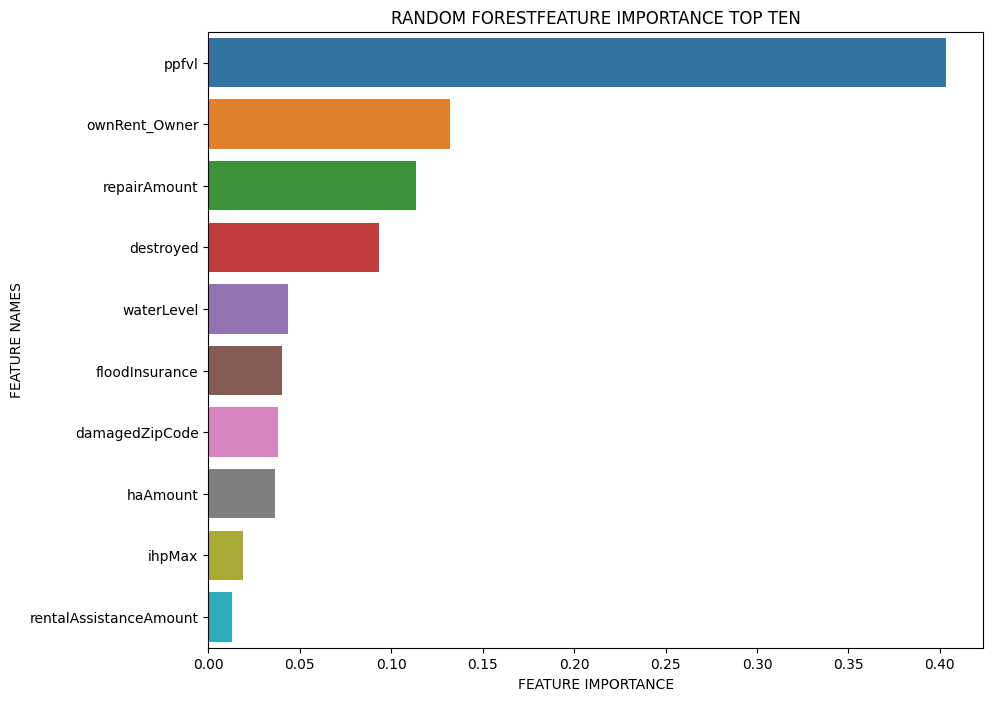

In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'RANDOM FOREST')

In [ ]:
#lets see the predicted data after scaling it

dele=pd.DataFrame(yscaler.inverse_transform(best_test_pred_rf.reshape(-1, 1)))
print(dele.shape)
dele[dele[0]>1]

(168723, 1)


,0
5,25866.9795
6,2391.7456
8,5029.1135
9,23314.8660
10,17431.9986
...,...
168714,17786.0504
168716,12549.3494
168718,10914.3943
168719,25416.2340


In [ ]:
#Actual values of flood claim amounts

dele=pd.DataFrame(yscaler.inverse_transform(y_test.reshape(-1, 1)))
print(dele.shape)
dele[dele[0]>1]

(168723, 1)


,0
5,45795.96
6,2515.64
8,5074.22
9,18781.08
10,17874.94
...,...
168714,15143.83
168716,12613.34
168718,10701.15
168719,38537.60


### SVR model and its performance

In [ ]:
# lets also build an SVR model
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_smaller,y_train_smaller)

best_train_pred_svr=regressor.predict(X_train_smaller)

#lets see the models rmse

mse=mean_squared_error(y_train_smaller, best_train_pred_svr, squared=False)
print(f"the root mean squared error for train data: {mse}")
print(f"the R2 score(Explained variance) for train data: {r2_score(y_train_smaller, best_train_pred_svr)}")

best_test_pred_svr=regressor.predict(X_test)

#lets see the models rmse

mse1=mean_squared_error(y_test, best_test_pred_svr, squared=False)
print(f"the root mean squared error for test data: {mse1}")
print(f"the R2 score(Explained variance) for test data: {r2_score(y_test, best_test_pred_svr)}")

# add these error values to plot error visualizations


errordf.loc[1,"Regressor"]="SVR"
errordf.loc[1,"Train_error"]=mse
errordf.loc[1,"Test_error"]=mse1
errordf.loc[1,"R2 score for test data"]=r2_score(y_test, best_test_pred_svr)

the root mean squared error for train data: 0.48958512767873985
the R2 score(Explained variance) for train data: 0.7705833539449902
the root mean squared error for test data: 0.47042740682992984
the R2 score(Explained variance) for test data: 0.7792388707785222


In [ ]:
#plot_feature_importance(regressor.feature_importances_,X.columns,'SVR ')

### XGBoost model and its performance

In [ ]:
#lets build a Xgboost model

import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)


best_train_pred_xgb=xgb_r.predict(X_train)

#lets see the models rmse

mse=mean_squared_error(y_train, best_train_pred_xgb, squared=False)
print(f"the root mean squared error for train data: {mse}")
print(f"the R2 score(Explained variance) for train data: {r2_score(y_train, best_train_pred_xgb)}")

best_test_pred_xgb=xgb_r.predict(X_test)

#lets see the models rmse

mse1=mean_squared_error(y_test, best_test_pred_xgb, squared=False)
print(f"the root mean squared error for test data: {mse1}")
print(f"the R2 score(Explained variance) for test data: {r2_score(y_test, best_test_pred_xgb)}")

# add these error values to plot error visualizations


errordf.loc[2,"Regressor"]="Xgboost"
errordf.loc[2,"Train_error"]=mse
errordf.loc[2,"Test_error"]=mse1
errordf.loc[2,"R2 score for test data"]=r2_score(y_test, best_test_pred_xgb)

[08:40:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
the root mean squared error for train data: 0.2663942784421771
the R2 score(Explained variance) for train data: 0.9290340884132718
the root mean squared error for test data: 0.3614647601927849
the R2 score(Explained variance) for test data: 0.8696625250868406


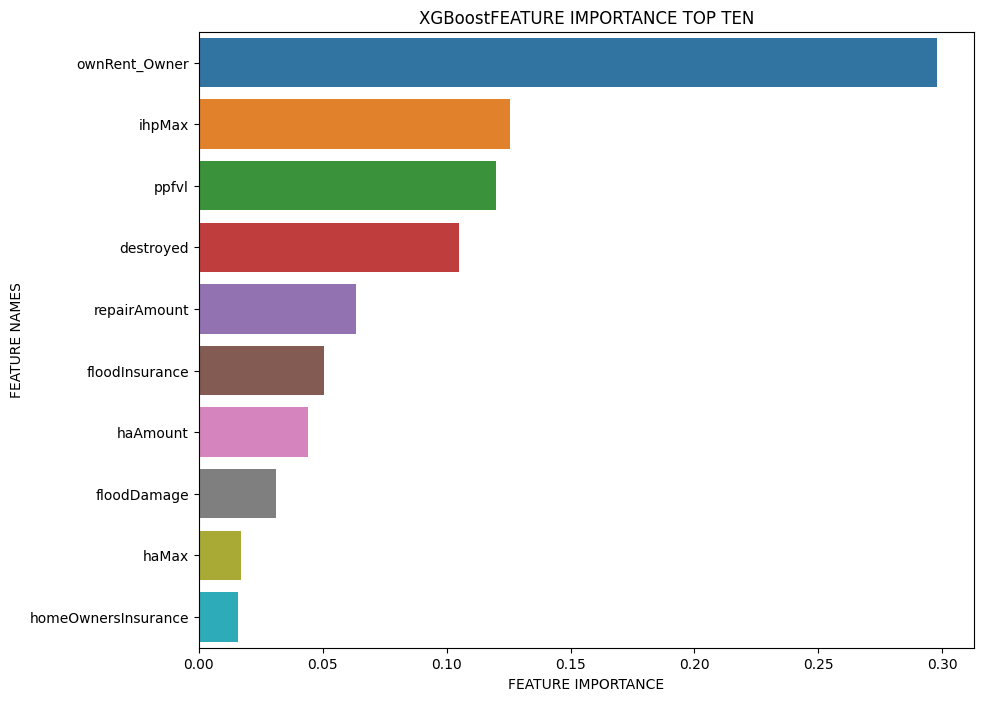

In [ ]:
plot_feature_importance(xgb_r.feature_importances_,X.columns,'XGBoost')

## Deep Learning model and its performance

In [ ]:
# Lets build a deep learning model on the data

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

### Deep Learning model with 2 hidden layers (128,64) neurons respectively 

In [ ]:

# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=36, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4736      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs =25, validation_data=(X_test, y_test))

Epoch 1/25
21091/21091 [==============================] - 55s 3ms/step - loss: 0.1884 - mae: 0.1174 - val_loss: 0.1559 - val_mae: 0.1027
Epoch 2/25
21091/21091 [==============================] - 57s 3ms/step - loss: 0.1666 - mae: 0.1052 - val_loss: 0.1537 - val_mae: 0.1023
Epoch 3/25
21091/21091 [==============================] - 60s 3ms/step - loss: 0.1580 - mae: 0.1021 - val_loss: 0.1446 - val_mae: 0.0992
Epoch 4/25
21091/21091 [==============================] - 57s 3ms/step - loss: 0.1573 - mae: 0.1011 - val_loss: 0.1356 - val_mae: 0.1019
Epoch 5/25
21091/21091 [==============================] - 56s 3ms/step - loss: 0.1526 - mae: 0.1006 - val_loss: 0.1337 - val_mae: 0.0991
Epoch 6/25
21091/21091 [==============================] - 54s 3ms/step - loss: 0.1503 - mae: 0.1002 - val_loss: 0.1516 - val_mae: 0.1020
Epoch 7/25
21091/21091 [==============================] - 56s 3ms/step - loss: 0.1508 - mae: 0.1003 - val_loss: 0.1379 - val_mae: 0.0956
Epoch 8/25
21091/21091 [=================

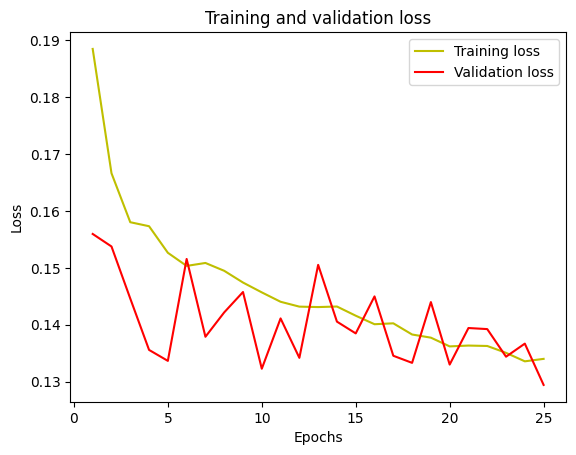

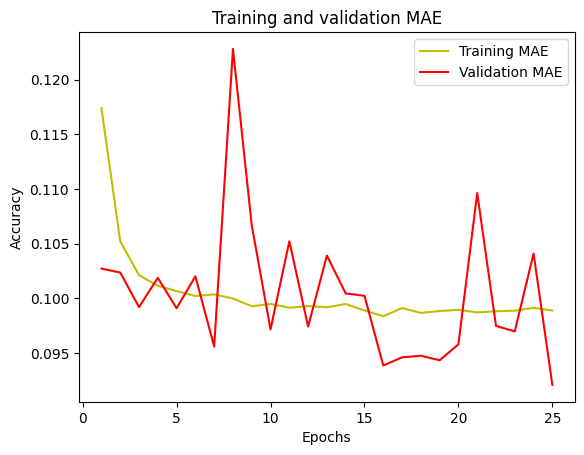

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#plot_feature_importance(model.feature_importances_,X.columns,'Deep Learning ')

In [ ]:

#Predict on test data
predictions = model.predict(X_test)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test)

5273/5273 [==============================] - 8s 1ms/step
Predicted values are:  [[-0.37516165]
 [-0.41273475]
 [-0.3851397 ]
 ...
 [-0.3764391 ]
 [-0.34881496]
 [ 0.2192564 ]]
Real values are:  [[-0.38121745]
 [-0.38121745]
 [-0.38121745]
 ...
 [-0.38121745]
 [-0.38121745]
 [ 0.18850388]]


In [ ]:
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

5273/5273 [==============================] - 8s 2ms/step - loss: 0.1294 - mae: 0.0921
Mean squared error from neural net:  0.12943488359451294
Mean absolute error from neural net:  0.09206388890743256


In [ ]:
mse_neural, mae_neural = model.evaluate(X_train, y_train)
errordf.loc[3,"Regressor"]="Deep Learning"
errordf.loc[3,"Train_error"]=mse_neural
mse_neural, mae_neural = model.evaluate(X_test, y_test)
errordf.loc[3,"Test_error"]=mse_neural
errordf.loc[3,"R2 score for test data"]=r2_score(y_test, predictions)

5273/5273 [==============================] - 9s 2ms/step - loss: 0.1294 - mae: 0.0921


# Result of all the models

In [ ]:
errordf

,Regressor,Train_error,Test_error,R2 score for test data
0,Random Forest,0.136605,0.356324,0.873343
1,SVR,0.489585,0.470427,0.779239
2,Xgboost,0.266394,0.361465,0.869663
3,Deep Learning,0.122796,0.129435,0.870881


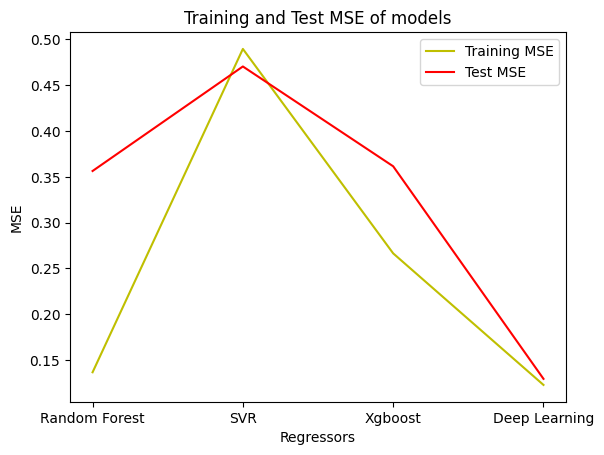

In [ ]:
plt.plot(errordf.Regressor, errordf.Train_error, 'y', label='Training MSE')
plt.plot(errordf.Regressor, errordf.Test_error, 'r', label='Test MSE')
plt.title('Training and Test MSE of models')
plt.xlabel('Regressors')
plt.ylabel('MSE')
plt.legend()
plt.show()

Text(0.5, 1.0, 'R2 scores of Models')

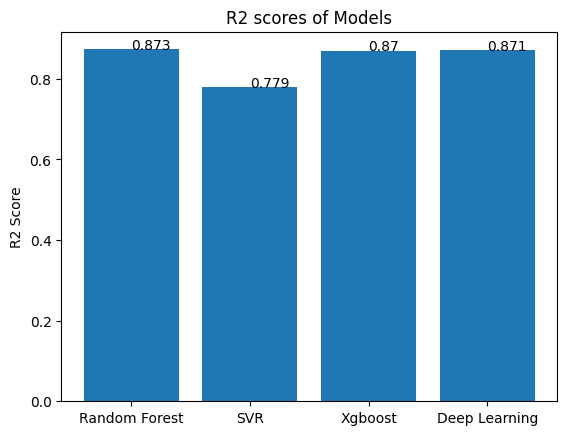

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i],3))

        
plt.bar(errordf.Regressor,errordf["R2 score for test data"])

# calling the function to add value labels
addlabels(errordf.Regressor,errordf["R2 score for test data"])

plt.ylabel("R2 Score")
plt.title("R2 scores of Models")